# ML Assignment 5 Solutions


In [159]:

pd.set_option('display.max_columns', None)
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
%matplotlib inline

A1. Summarize the data set with descriptive statistics. You should print a count, average, min,
max value, columns’ names in dataset. Use the “head(),” “describe(),” “info()” functions in the
Pandas library.

In [160]:
df= pd.read_csv("bankmarketing.csv")

In [161]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [163]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


A2. Prepare the data to build a model. Use the “preprocessing.LabelEncoder()” function in the sklearn library

In [164]:

cat= (df.dtypes=='object')
cat_cols= list(cat[cat].index)

print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [165]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [166]:
ord_cols= ["education","month","day_of_week"]
itv_cols= [x for x in cat_cols if x not in ord_cols]
itv_cols

['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

In [167]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [168]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le= LabelEncoder()
for i in ord_cols:
    df[i]= df[[i]].apply(le.fit_transform)

df=pd.get_dummies(df,columns=itv_cols,drop_first=True)
df.columns

Index(['age', 'education', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'y_yes'],
      dtype='object')

In [169]:
df.drop(axis=1,columns=['job_housemaid', 'job_retired', 'job_self-employed',
'job_entrepreneur','job_student','job_unemployed','job_unknown', ],inplace=True)

In [170]:

scaler= StandardScaler()
scaler.fit(df)
scaled_df= pd.DataFrame(scaler.transform(df),columns=df.columns)
print("All features are now scaled")

All features are now scaled


A3. Build a hybrid model with the k-means clustering and the agglomerative clustering. Use the
KMeans and Elbow methods.


In [171]:
from sklearn.decomposition import PCA

pca= PCA(n_components=3)
pca.fit(scaled_df)
PCA_df= pd.DataFrame(pca.transform(scaled_df),columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,41188.0,1.025646e-14,2.258743,-3.422236,-1.627950,-1.162198,1.574123,9.729310
col2,41188.0,1.808644e-15,1.508033,-3.795092,-1.032919,0.100911,0.991758,7.896406
col3,41188.0,1.430519e-15,1.442478,-3.197999,-0.807907,-0.149099,0.527197,10.541636


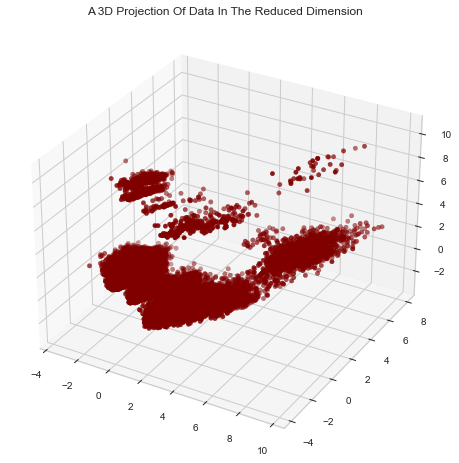

In [172]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


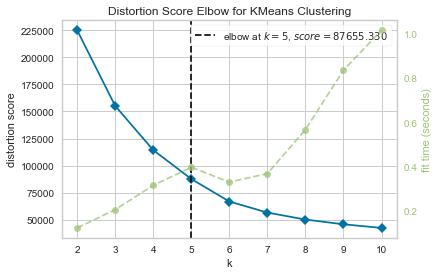

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [173]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [174]:
#데이터 셋이 너무 커서 샘플링을 통하여 학습 시간을 단축시키도록 하겠다.
df_sample= PCA_df.sample(frac=0.1,random_state=1)

x =df_sample["col1"]
y =df_sample["col2"]
z =df_sample["col3"]

In [175]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib import colors

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_sample)
df_sample["Clusters"] = yhat_AC


A4. Visualize the clusters in terms of key predictors.


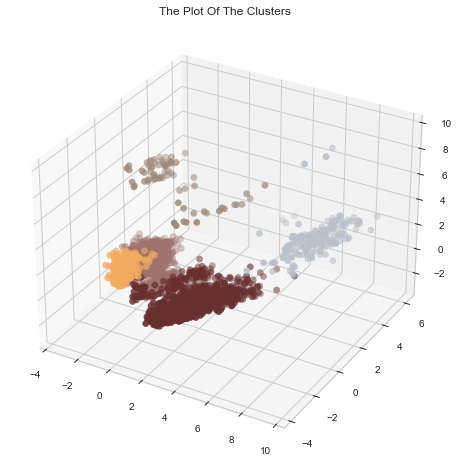

In [176]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_sample["Clusters"], marker='o',cmap= cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

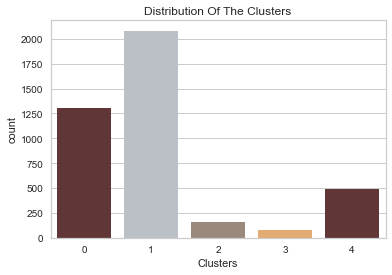

In [177]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_sample["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

## B1. Prepare the data to find out association rules and drop the missing values. You can use the
“preprocessing.TransactionEncoder()” function in the sklearn library. Please be reminded of the
Boolean expression.

In [178]:
import seaborn as sns
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [179]:
basket=pd.read_csv('TV_Shows-Association_Rules_Learning.csv')

In [181]:
records= []
for i in range(len(basket)):
    records.append([str(basket.values[i,j]) for j in range(len(basket.columns))])

In [182]:
TE= TransactionEncoder()
array= TE.fit(records).transform(records)

transf_df= pd.DataFrame(array,columns=TE.columns_)
transf_df

,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,Banshee,Berlin Station,Better Call Saul,Big Little Lies,Billions,Black Clover,Bojack Horseman,Breaking Bad,Brooklyn Nine Nine,Chernobyl,Cobra Kai,Constantine,Daredevil,Dark,Death Note,Deception,Demon Slayer,Designated Survivor,Dexter,Doctor Who,Dr Stone,Dr. House,Elementary,Elite,Emily in Paris,Euphoria,Family Guy,Friends,Fringe,Game of thrones,Goliath,Good Omens,Gotham,Grey's Anatomy,Grimm,Hanna,Haven,Heros,His Dark Materials,Homeland,House of Cards,How I met your mother,How to get away with murder,Hunters,Inhumans,Inside Job,Into the night,Invincible,Iron Fist,Jack Ryan,Kingdom,Locke & Key,Loki,Lost,Lost in Space,Love Death Robots,Lucifer,Lupin,Madmen,Mare of Easttown,Mindhunter,Mirzapur,Modern Family,Mr. Robot,Narcos,Naruto,Nine Perfect Strangers,One Piece,Only Murders in the building,Orphan Black,Outer Banks,Outlander,Ozark,Peaky Blinders,Perception,Person of Interest,Preacher,Prison Break,Punisher,Queen of the South,Ragnarok,Rick And Morty,Riverdale,Rome,Sacred Games,Schitts Creek,Sense 8,Sex Education,Shadow and Bone,Sherlock,Shooter,Sneaky Pete,Sons of Anarchy,Sopranos,South Park,Space Force,Spartacus,Squid Game,Startup,Stranger Things,Succession,Suits,Supergirl,Supernatural,Teen Wolf,The 100,The Alienist,The Big Bang Theory,The Blacklist,The Boys,The Expanse,The Flash,The Good Doctor,The Handmaid's Tale,The IT Crowd,The Innocent,The Mentalist,The Nevers,The Newsroom,The Night Manager,The Office,The Originals,The Outsider,The Queen's Gambit,The Stranger,The Tick,The Umbrella Academy,The Vampire Diaries,The Walking Dead,The Wheel of Time,The White Lotus,The Wilds,The Wire,The Witcher,The man in the high castle,Travellers,True Detective,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon,nan
0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [183]:
#column names
for col in transf_df.columns:
    print(col)

12 Monkeys
24
Absentia
Alice in Borderland
Altered Carbon
American Gods
Another Life
Archer
Arrow
Atypical
Banshee
Berlin Station
Better Call Saul
Big Little Lies
Billions
Black Clover
Bojack Horseman
Breaking Bad
Brooklyn Nine Nine
Chernobyl
Cobra Kai
Constantine
Daredevil
Dark
Death Note
Deception
Demon Slayer
Designated Survivor
Dexter
Doctor Who
Dr Stone
Dr. House
Elementary
Elite
Emily in Paris
Euphoria
Family Guy
Friends
Fringe
Game of thrones
Goliath
Good Omens
Gotham
Grey's Anatomy
Grimm
Hanna
Haven
Heros
His Dark Materials
Homeland
House of Cards
How I met your mother
How to get away with murder
Hunters
Inhumans
Inside Job
Into the night
Invincible
Iron Fist
Jack Ryan
Kingdom
Locke & Key
Loki
Lost
Lost in Space
Love Death Robots
Lucifer
Lupin
Madmen
Mare of Easttown
Mindhunter
Mirzapur
Modern Family
Mr. Robot
Narcos
Naruto
Nine Perfect Strangers
One Piece
Only Murders in the building
Orphan Black
Outer Banks
Outlander
Ozark
Peaky Blinders
Perception
Person of Interest
Preacher

In [184]:
basket_clean= transf_df.drop(["nan"],axis=1)
basket_clean

,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,Banshee,Berlin Station,Better Call Saul,Big Little Lies,Billions,Black Clover,Bojack Horseman,Breaking Bad,Brooklyn Nine Nine,Chernobyl,Cobra Kai,Constantine,Daredevil,Dark,Death Note,Deception,Demon Slayer,Designated Survivor,Dexter,Doctor Who,Dr Stone,Dr. House,Elementary,Elite,Emily in Paris,Euphoria,Family Guy,Friends,Fringe,Game of thrones,Goliath,Good Omens,Gotham,Grey's Anatomy,Grimm,Hanna,Haven,Heros,His Dark Materials,Homeland,House of Cards,How I met your mother,How to get away with murder,Hunters,Inhumans,Inside Job,Into the night,Invincible,Iron Fist,Jack Ryan,Kingdom,Locke & Key,Loki,Lost,Lost in Space,Love Death Robots,Lucifer,Lupin,Madmen,Mare of Easttown,Mindhunter,Mirzapur,Modern Family,Mr. Robot,Narcos,Naruto,Nine Perfect Strangers,One Piece,Only Murders in the building,Orphan Black,Outer Banks,Outlander,Ozark,Peaky Blinders,Perception,Person of Interest,Preacher,Prison Break,Punisher,Queen of the South,Ragnarok,Rick And Morty,Riverdale,Rome,Sacred Games,Schitts Creek,Sense 8,Sex Education,Shadow and Bone,Sherlock,Shooter,Sneaky Pete,Sons of Anarchy,Sopranos,South Park,Space Force,Spartacus,Squid Game,Startup,Stranger Things,Succession,Suits,Supergirl,Supernatural,Teen Wolf,The 100,The Alienist,The Big Bang Theory,The Blacklist,The Boys,The Expanse,The Flash,The Good Doctor,The Handmaid's Tale,The IT Crowd,The Innocent,The Mentalist,The Nevers,The Newsroom,The Night Manager,The Office,The Originals,The Outsider,The Queen's Gambit,The Stranger,The Tick,The Umbrella Academy,The Vampire Diaries,The Walking Dead,The Wheel of Time,The White Lotus,The Wilds,The Wire,The Witcher,The man in the high castle,Travellers,True Detective,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon
0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

한 개의 컬럼이 제거됨

## B2. Visualize the most popular 10 items in the data se

Most Popular Items in the dataset

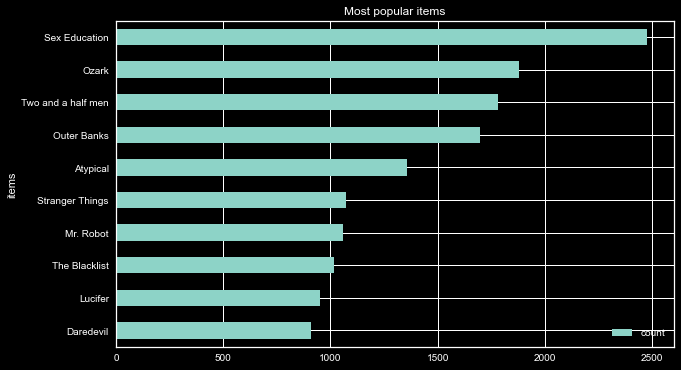

In [186]:
# Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
matplotlib.style.use('dark_background')
ax = pop_item.plot.barh(x='items', y='count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

B3. Show a list of association rules. Use the “apriori” and “association_rules” function

In [187]:
# 0.04 minimum support
a_rules = apriori(basket_clean, min_support= 0.05, use_colnames=True)
a_rules.head()

,support,itemsets
0,0.058520,(12 Monkeys)
1,0.077098,(Absentia)
2,0.057798,(Archer)
3,0.139953,(Atypical)
4,0.055527,(Berlin Station)


In [190]:
rules = association_rules(a_rules , metric = 'lift', min_threshold =1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Atypical),(Sex Education),0.139953,0.255651,0.056146,0.401180,1.569250,0.020367,1.243027
1,(Sex Education),(Atypical),0.255651,0.139953,0.056146,0.219621,1.569250,0.020367,1.102089
2,(Ozark),(Sex Education),0.193725,0.255651,0.075137,0.387853,1.517120,0.025611,1.215965
3,(Sex Education),(Ozark),0.255651,0.193725,0.075137,0.293904,1.517120,0.025611,1.141877
4,(Two and a half men),(Sex Education),0.183610,0.255651,0.056559,0.308038,1.204918,0.009619,1.075709
5,(Sex Education),(Two and a half men),0.255651,0.183610,0.056559,0.221235,1.204918,0.009619,1.048314


In [205]:
rules = association_rules(a_rules , metric = 'support', min_threshold =0.04)
rules.sort_values(by='support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Ozark),(Sex Education),0.193725,0.255651,0.075137,0.387853,1.517120,0.025611,1.215965
3,(Sex Education),(Ozark),0.255651,0.193725,0.075137,0.293904,1.517120,0.025611,1.141877
4,(Two and a half men),(Sex Education),0.183610,0.255651,0.056559,0.308038,1.204918,0.009619,1.075709
5,(Sex Education),(Two and a half men),0.255651,0.183610,0.056559,0.221235,1.204918,0.009619,1.048314
0,(Atypical),(Sex Education),0.139953,0.255651,0.056146,0.401180,1.569250,0.020367,1.243027
1,(Sex Education),(Atypical),0.255651,0.139953,0.056146,0.219621,1.569250,0.020367,1.102089


In [206]:
rules = association_rules(a_rules , metric = 'confidence', min_threshold =0.04)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Atypical),(Sex Education),0.139953,0.255651,0.056146,0.401180,1.569250,0.020367,1.243027
2,(Ozark),(Sex Education),0.193725,0.255651,0.075137,0.387853,1.517120,0.025611,1.215965
4,(Two and a half men),(Sex Education),0.183610,0.255651,0.056559,0.308038,1.204918,0.009619,1.075709
3,(Sex Education),(Ozark),0.255651,0.193725,0.075137,0.293904,1.517120,0.025611,1.141877
5,(Sex Education),(Two and a half men),0.255651,0.183610,0.056559,0.221235,1.204918,0.009619,1.048314
1,(Sex Education),(Atypical),0.255651,0.139953,0.056146,0.219621,1.569250,0.020367,1.102089


In [207]:
rules = association_rules(a_rules , metric = 'lift', min_threshold =1)
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Sex Education),(Atypical),0.255651,0.139953,0.056146,0.219621,1.569250,0.020367,1.102089
0,(Atypical),(Sex Education),0.139953,0.255651,0.056146,0.401180,1.569250,0.020367,1.243027
2,(Ozark),(Sex Education),0.193725,0.255651,0.075137,0.387853,1.517120,0.025611,1.215965
3,(Sex Education),(Ozark),0.255651,0.193725,0.075137,0.293904,1.517120,0.025611,1.141877
4,(Two and a half men),(Sex Education),0.183610,0.255651,0.056559,0.308038,1.204918,0.009619,1.075709
5,(Sex Education),(Two and a half men),0.255651,0.183610,0.056559,0.221235,1.204918,0.009619,1.048314


B4. Recommend several item sets of the TV shows based on the support, confidence, and lift
measures

- In the aspect of support,(Ozark) and	(Sex Education) is  most related
- In the aspect of confidence, (Atypical) and	(Sex Education)	is most related
- In the aspect of lift, (Sex Education)	(Atypical) is most related

As a result,   
If you liked Ozark, you will probably like Sex education and Atypical as well. 